<a href="https://colab.research.google.com/github/BibekExplorer/2409013_Bibek-Singh-Bhandari/blob/main/Bibek_Singh_Bhandari_2409013_final_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 AI-Based Analysis of Business and Industry Reports


Classification Task

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
# Load Dataset
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Billionaires Statistics Dataset.csv')
# Display basic information
print("Dataset Overview:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())
print("\nColumn Names:\n", df.columns)
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())
print("\nColumn Names:\n", df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

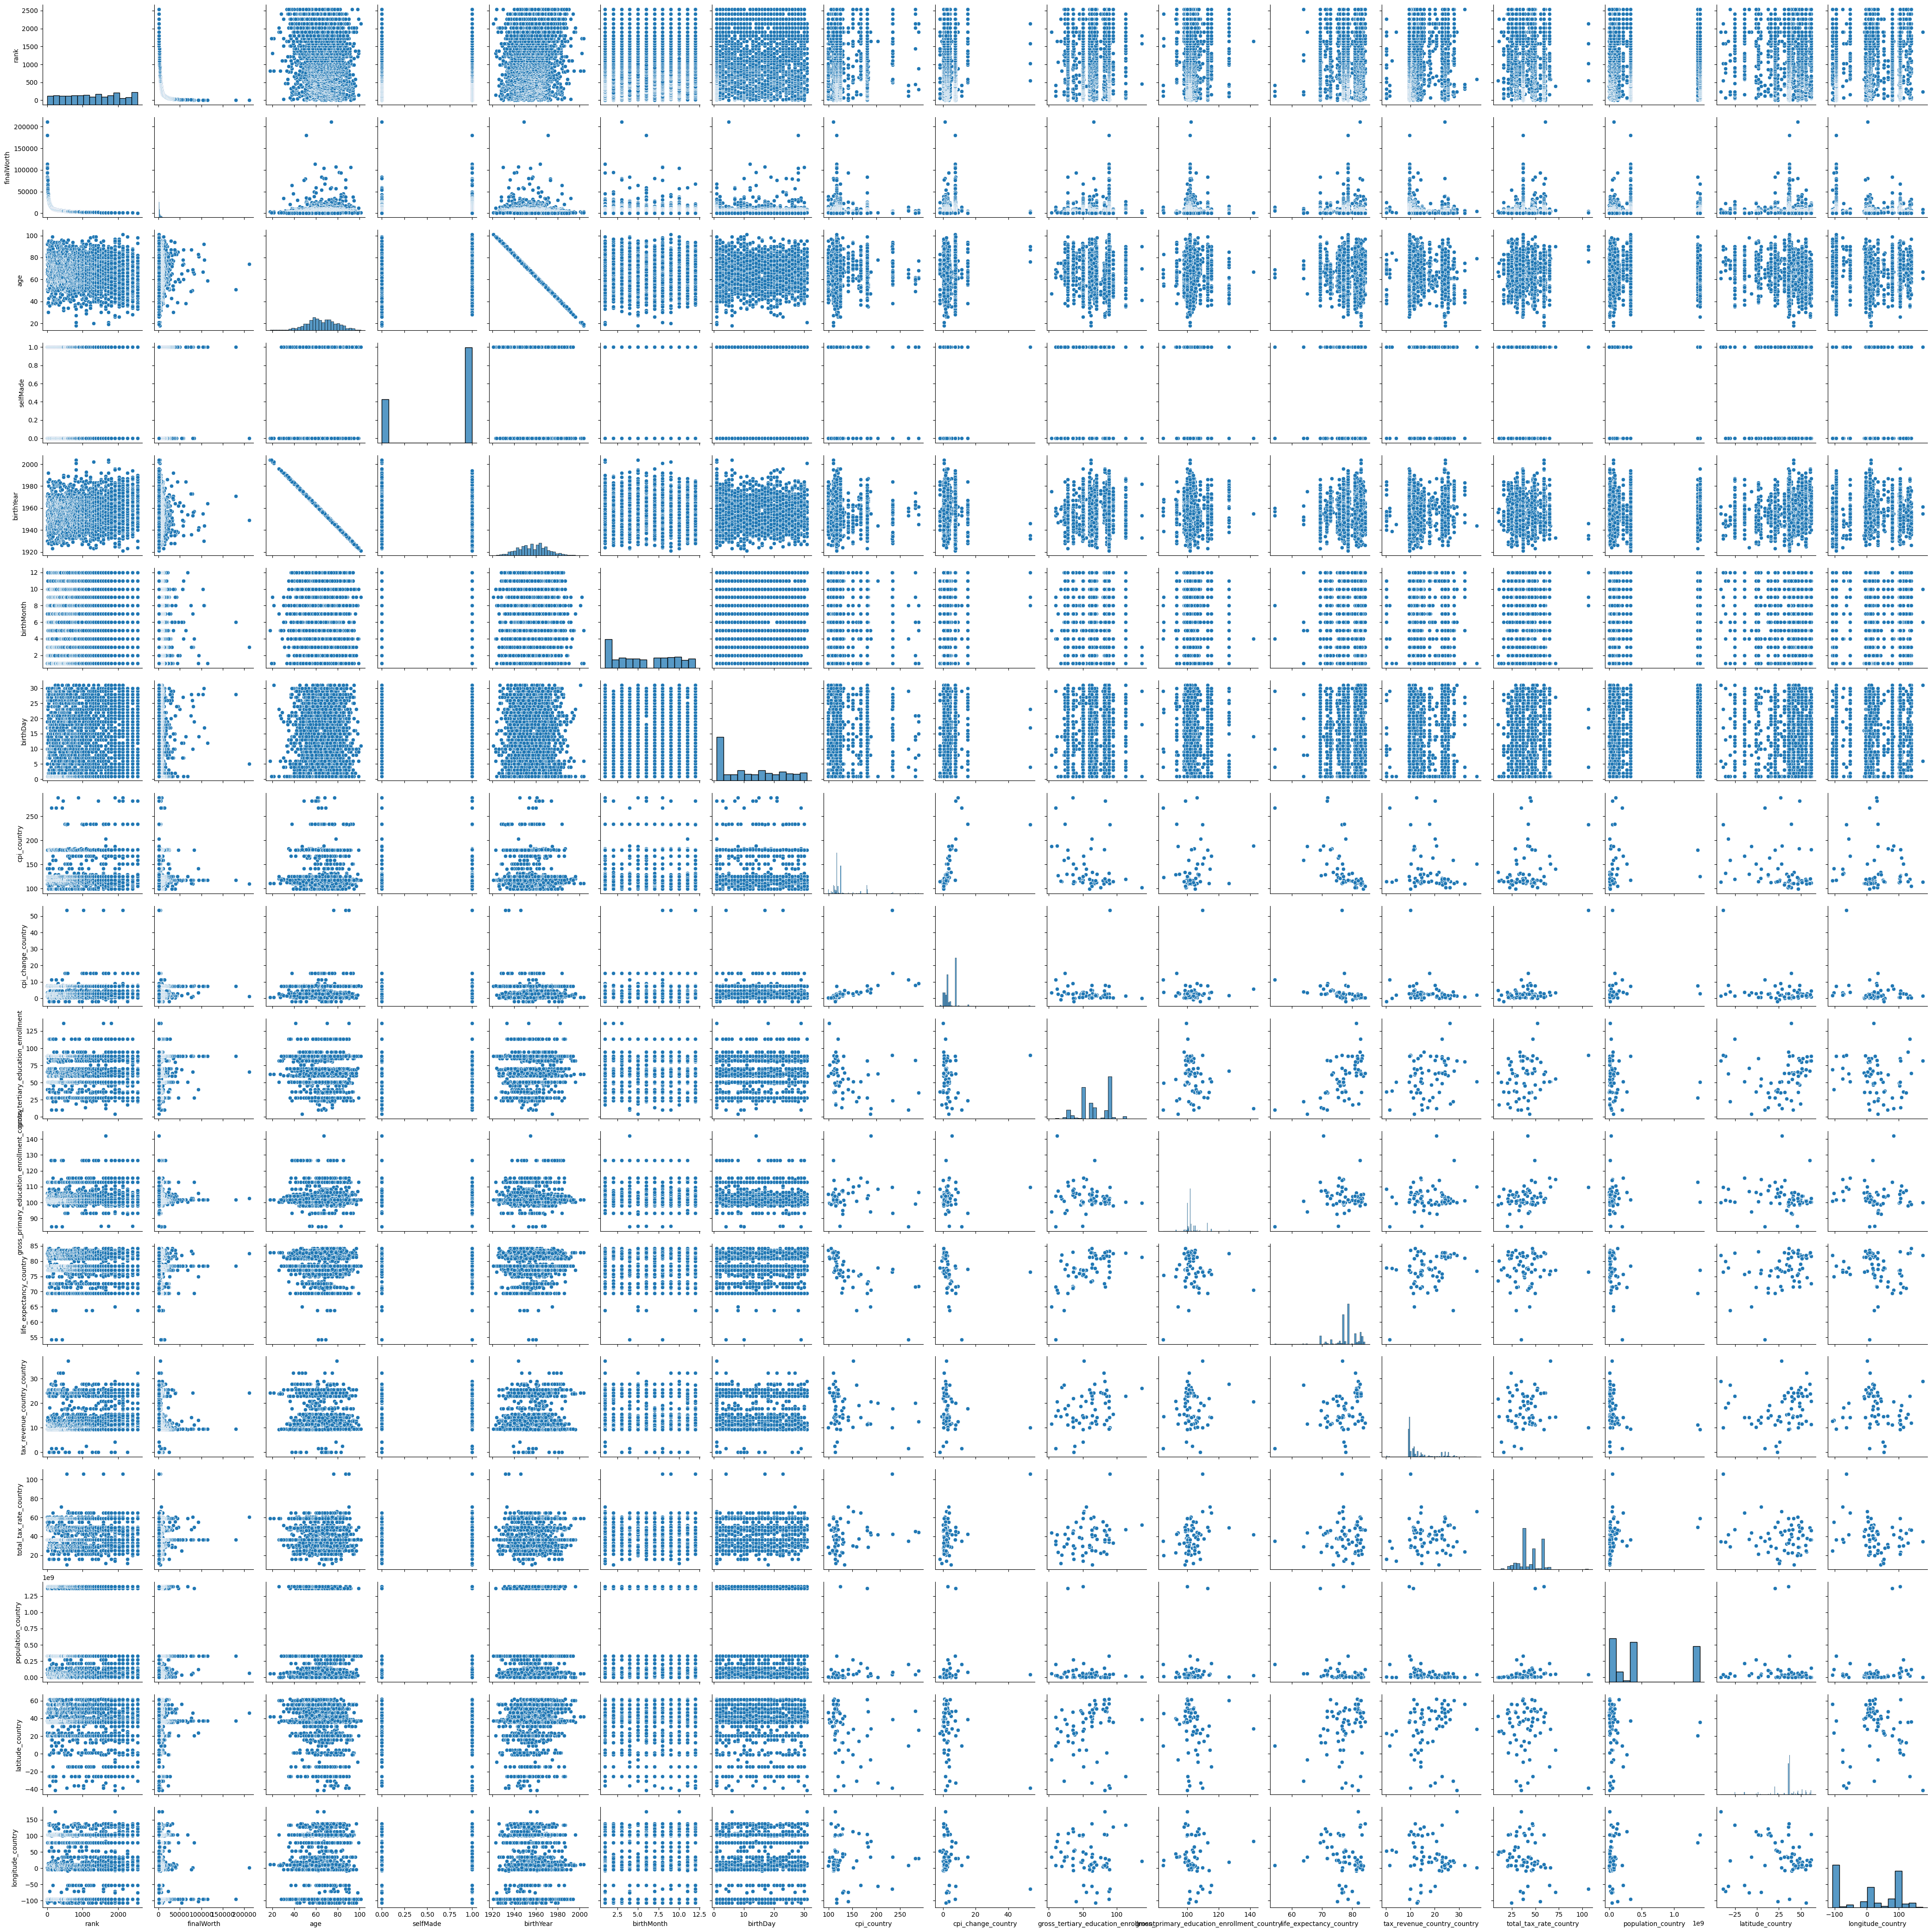

<ipython-input-6-9c5b35cb7516>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[target_column], palette="viridis")


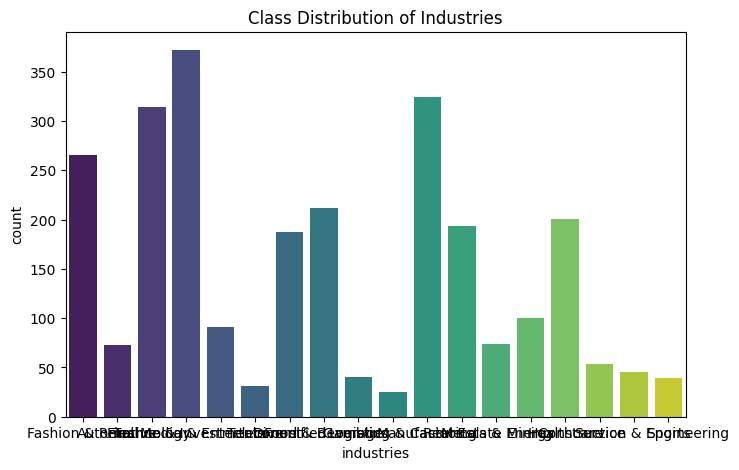

<ipython-input-6-9c5b35cb7516>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[target_column], palette="viridis")


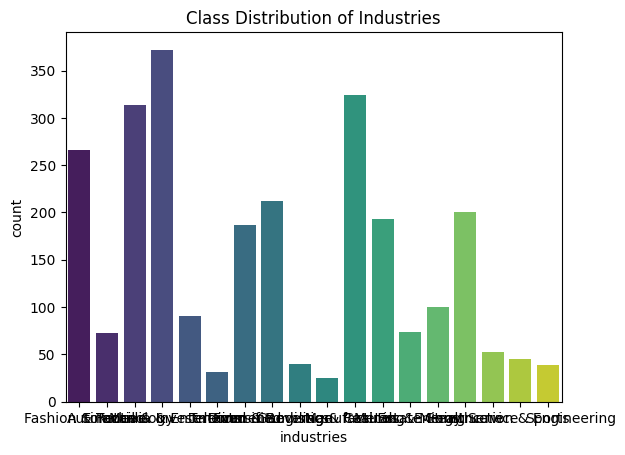

In [ ]:
# Choosing an appropriate target column
target_column = 'industries'

# Pairplot to explore relationships (Only for small datasets)
# Choosing an appropriate target column
target_column = 'industries'

# Pairplot to explore relationships (Only for small datasets)
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()
# Class Distribution
plt.figure(figsize=(8,5))
sns.countplot(x=df[target_column], palette="viridis")
plt.title("Class Distribution of Industries")
plt.show()
sns.countplot(x=df[target_column], palette="viridis")
plt.title("Class Distribution of Industries")
plt.show()

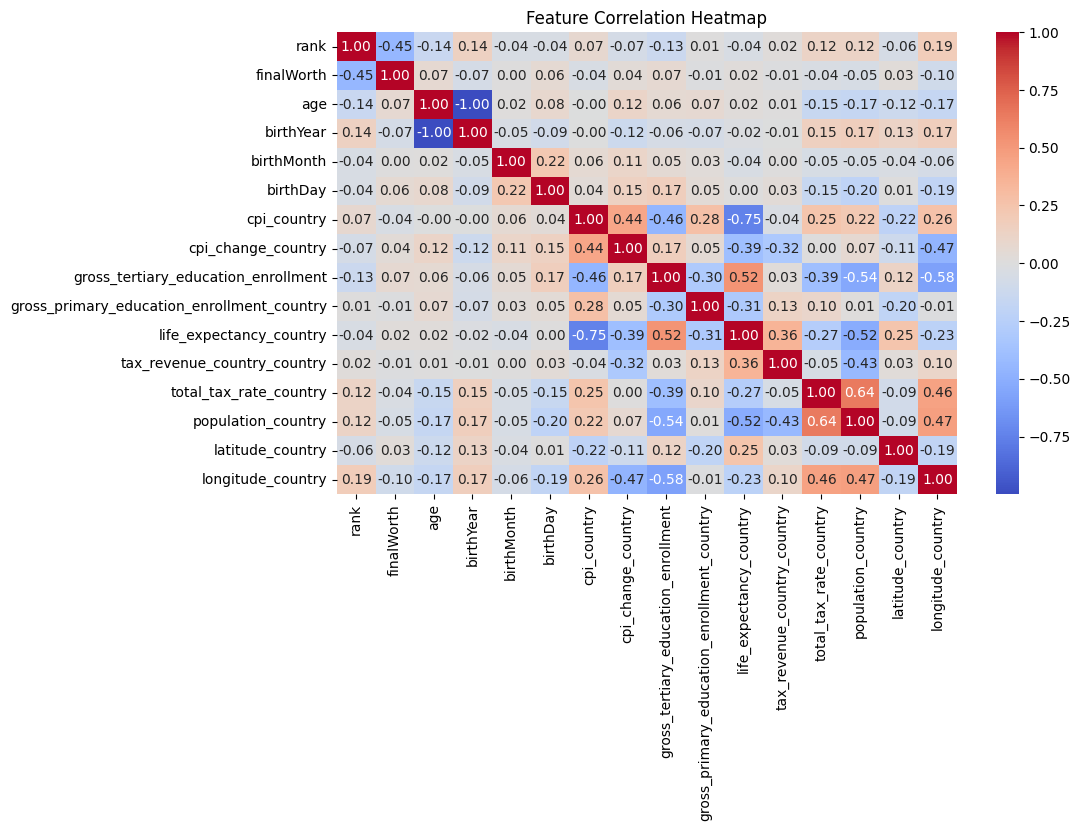

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()

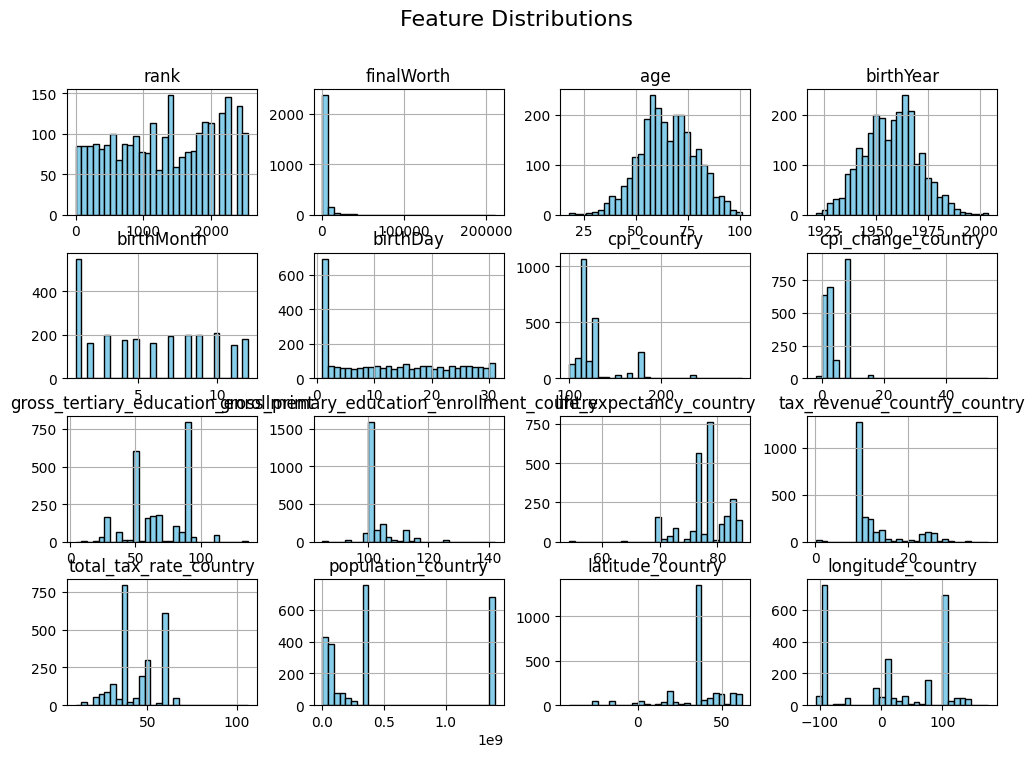

In [ ]:

# Feature Distributions
df.hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

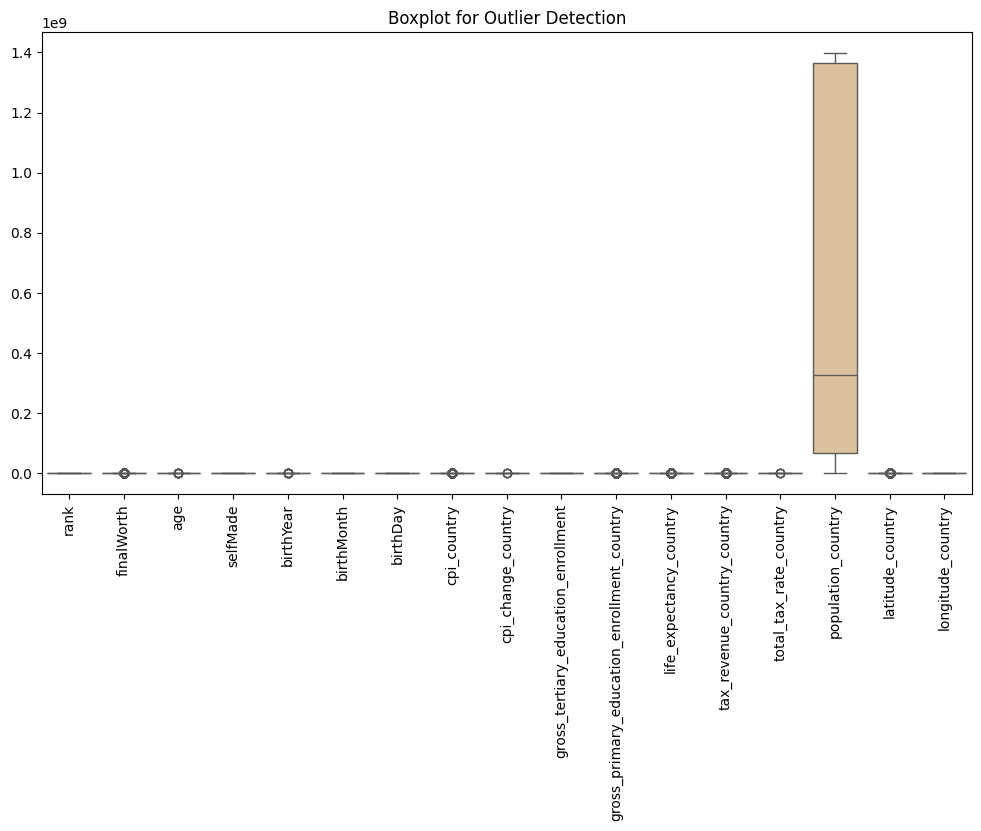

In [ ]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df, palette="Set2")
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
# Data Preprocessing
# Handle missing values
# Splitting dataset into features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]
# Convert categorical columns to numeric if necessary
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder() # This line and the following lines within the loop should be indented
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
# Splitting dataset into features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Logistic Regression from Scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        theta -= (alpha/m) * (X.T @ (sigmoid(X @ theta) - y))
    return theta
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta = np.zeros(X_train_bias.shape[1])
optimized_theta = gradient_descent(X_train_bias, y_train, theta,
alpha=0.01, iterations=1000)
# Predict using custom Logistic Regression
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)
y_pred_custom = predict(np.c_[np.ones((X_test.shape[0], 1)), X_test],optimized_theta)
print("Custom Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test,y_pred_custom))

Custom Logistic Regression Performance:
Accuracy: 0.020833333333333332
Classification Report:
               precision    recall  f1-score   support

           0       0.02      1.00      0.04        11
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        48
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00        41
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00        12
          10       0.00      0.00      0.00        83
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00        49
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
# Train Classification Models
models_class = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models_class.items():
    model.fit(X_train_class, y_train_class)
    y_pred = model.predict(X_test_class)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test_class, y_pred))
    print("Classification Report:\n", classification_report(y_test_class, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred))


Logistic Regression Performance:
Accuracy: 0.615530303030303
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.36      0.36        11
           1       0.20      0.14      0.17         7
           2       0.67      0.68      0.67        41
           3       0.60      0.35      0.44        17
           4       0.57      0.58      0.58        48
           5       0.58      0.79      0.67        68
           6       0.59      0.41      0.49        41
           7       0.00      0.00      0.00         6
           8       0.59      0.56      0.58        34
           9       0.00      0.00      0.00        12
          10       0.64      0.84      0.73        83
          11       0.10      0.06      0.08        16
          12       0.24      0.27      0.25        15
          13       0.73      0.71      0.72        49
          14       0.20      0.11      0.14         9
          15       0.50      0.18      0.27      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Performance:
Accuracy: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       1.00      0.29      0.44         7
           2       0.74      0.78      0.76        41
           3       1.00      0.41      0.58        17
           4       0.76      0.92      0.83        48
           5       0.84      0.99      0.91        68
           6       0.88      0.88      0.88        41
           7       0.67      0.33      0.44         6
           8       0.80      0.94      0.86        34
           9       0.40      0.17      0.24        12
          10       0.80      0.89      0.85        83
          11       0.86      0.75      0.80        16
          12       0.64      0.47      0.54        15
          13       0.86      0.88      0.87        49
          14       0.50      0.22      0.31         9
          15       1.00      0.45      0.62        11


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
# Hyperparameter Optimization for Classification
param_grid_class = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]}
}
best_models_class = {}
for name, model in models_class.items():
    grid_search = GridSearchCV(model, param_grid_class[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_class, y_train_class)
    best_models_class[name] = grid_search.best_estimator_
    print(f"\nBest parameters for {name}: {grid_search.best_params_}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Best parameters for Logistic Regression: {'C': 10}

Best parameters for Decision Tree: {'max_depth': 10}

Best parameters for Random Forest: {'n_estimators': 200}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.feature_selection import RFE


# Feature Selection using RFE for Classification
rfe_class = RFE(LogisticRegression(), n_features_to_select=5)
rfe_class.fit(X_train_class, y_train_class)

# Use X.columns instead of X_class.columns
selected_features_class = X.columns[rfe_class.support_]  # Change here

print("\nSelected Features for Classification:", selected_features_class)


Selected Features for Classification: Index(['category', 'source', 'cpi_country', 'cpi_change_country',
       'longitude_country'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.feature_selection import RFE


# Final Model Evaluation
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\nFinal {name} Model Performance:")
    # Use regression metrics instead of classification metrics
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))


Final Ridge Regression Model Performance:
MSE: 1.2664484510451133e-05
R2 Score: 0.9999994316965505

Final Lasso Regression Model Performance:
MSE: 0.009481562263472102
R2 Score: 0.9995745263428046

Final Decision Tree Model Performance:
MSE: 0.041666666666666664
R2 Score: 0.9981302586475538

Final Random Forest Model Performance:
MSE: 0.017395833333333336
R2 Score: 0.9992193829853537


Regression Task

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
# Load Dataset
df =pd.read_csv('/content/drive/MyDrive/Billionaires Statistics Dataset.csv')
# Display basic information
print("Dataset Overview:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

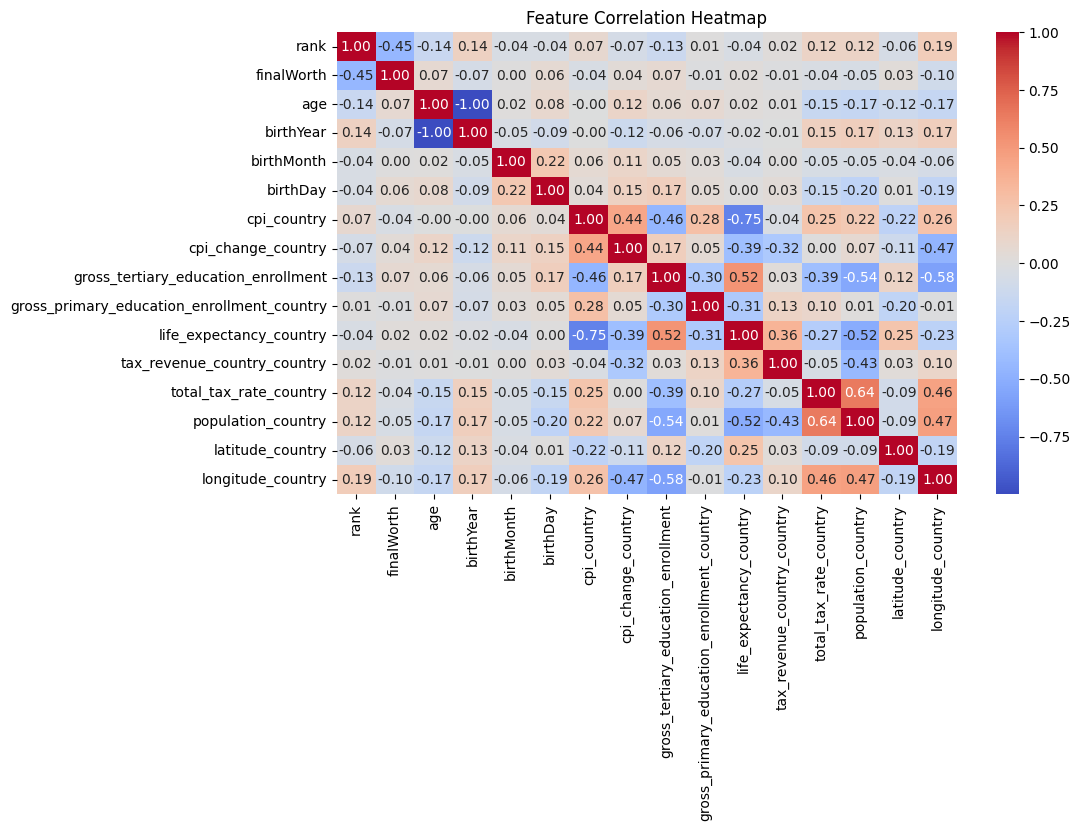

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm",
fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

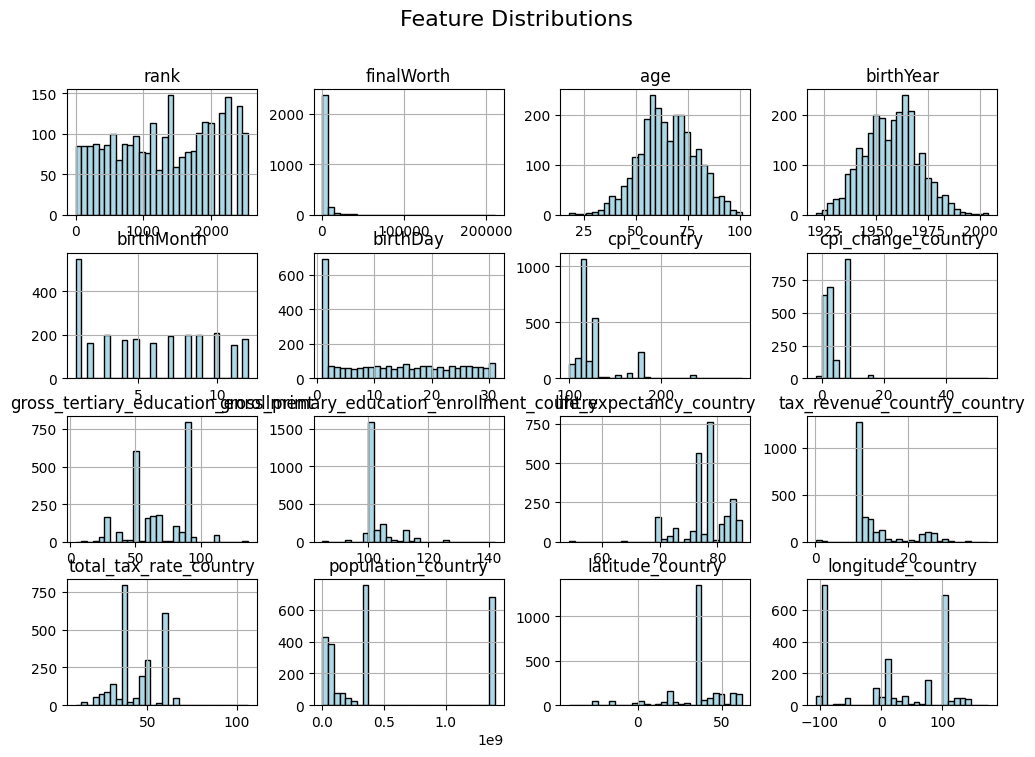

In [ ]:
# Feature Distributions
df.hist(figsize=(12, 8), bins=30, color='lightblue',
edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

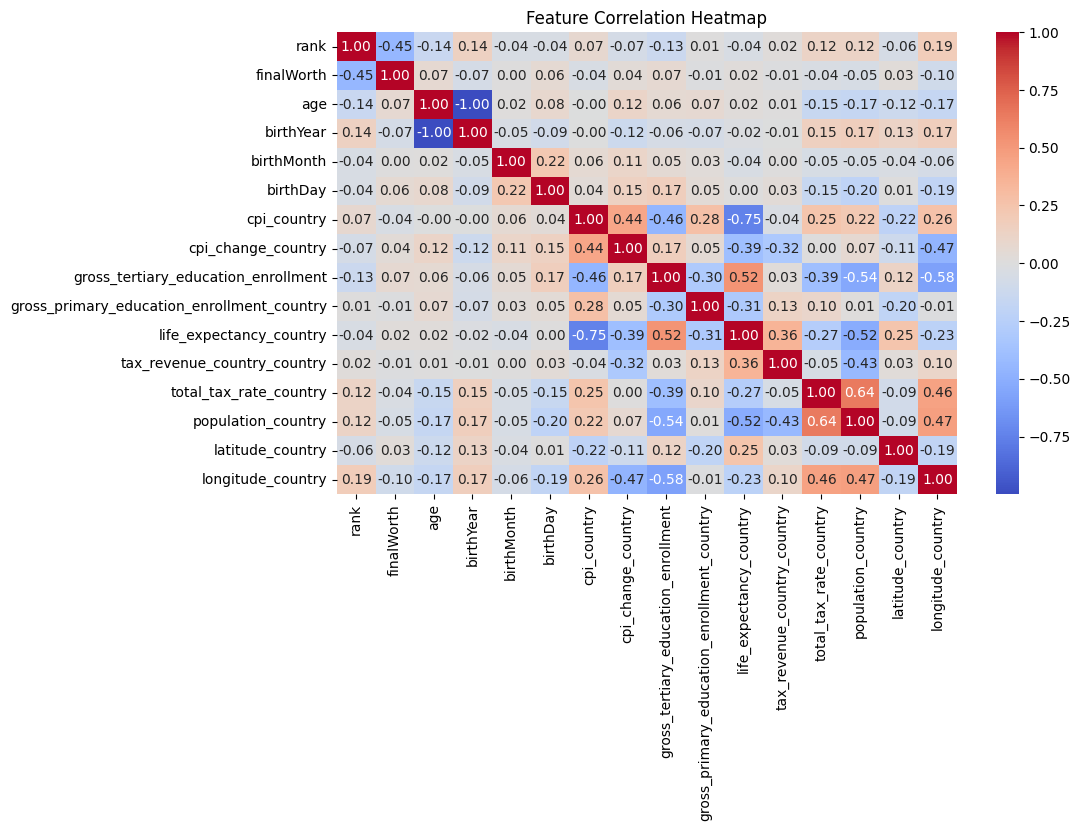

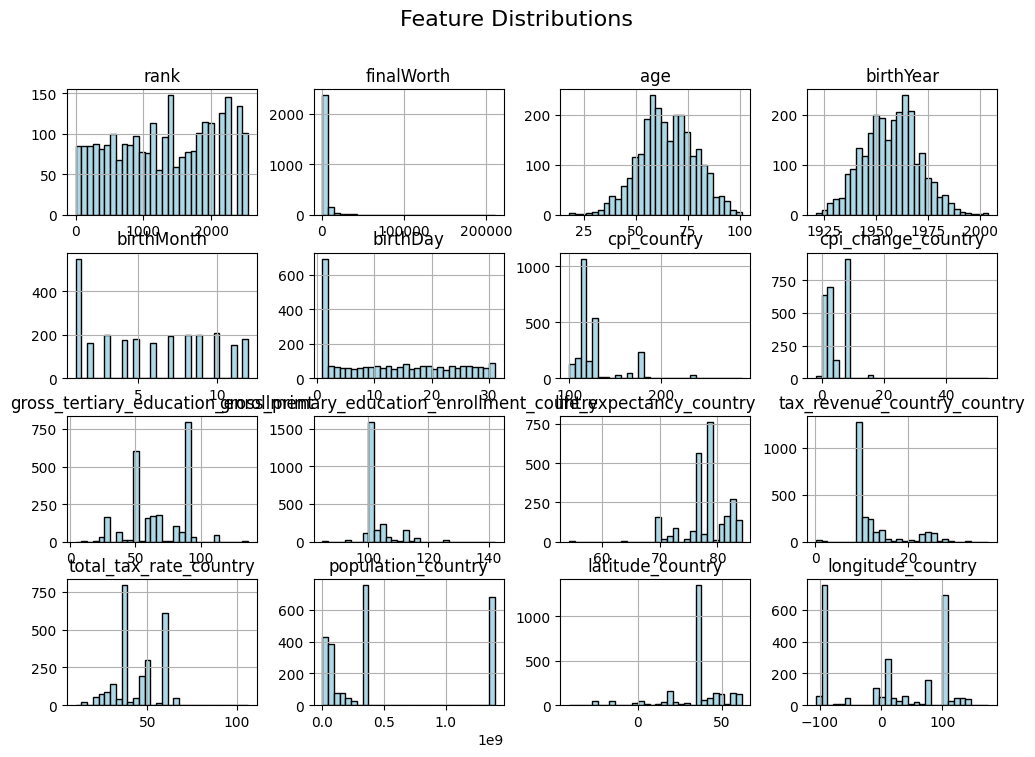

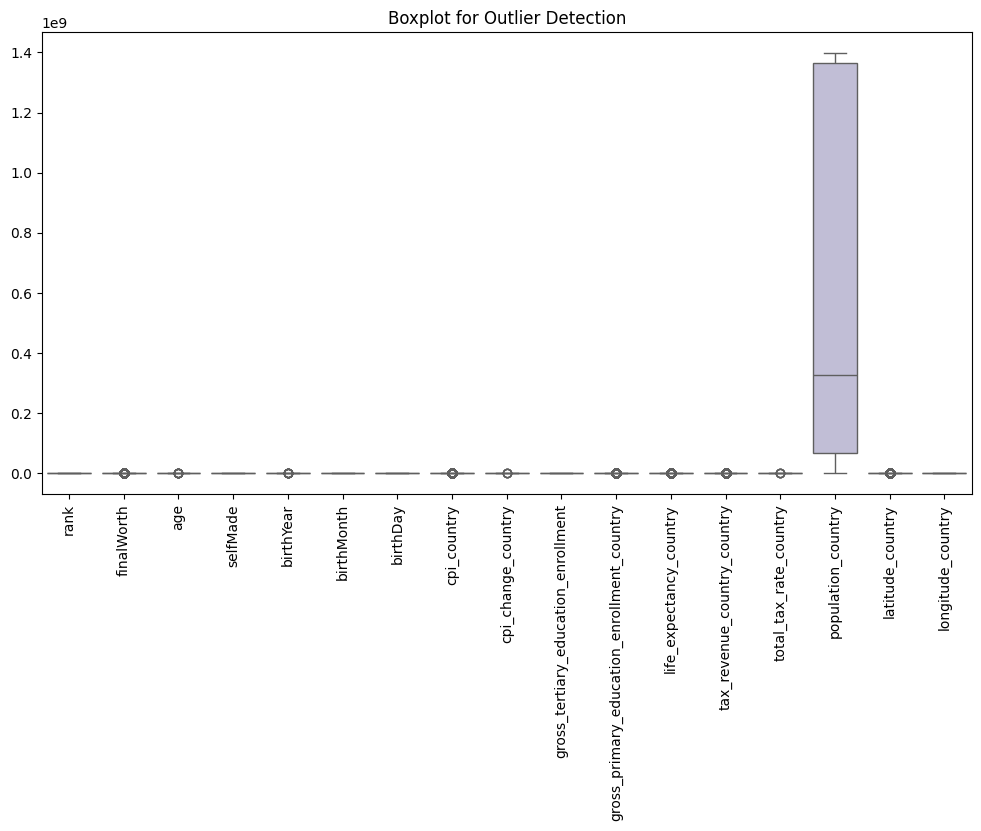


Linear Regression Performance:
MSE: 2.536023464263632e-28
R2 Score: 1.0

Ridge Regression Performance:
MSE: 0.001243284013196293
R2 Score: 0.9999442091312246

Lasso Regression Performance:
MSE: 0.9481562263472104
R2 Score: 0.9574526342804617

Decision Tree Performance:
MSE: 0.020833333333333332
R2 Score: 0.9990651293237769

Random Forest Performance:
MSE: 0.016764583333333343
R2 Score: 0.9992477095668433

Best parameters for Ridge Regression:
{'alpha': 0.1}

Best parameters for Lasso Regression:
{'alpha': 0.1}

Best parameters for Decision Tree:
{'max_depth': 10}

Best parameters for Random Forest:
{'n_estimators': 200}

Selected Features: Index(['category', 'countryOfCitizenship', 'organization', 'firstName',
       'birthMonth'],
      dtype='object')

Final Ridge Regression Model Performance:
MSE: 1.2664484510451133e-05
R2 Score: 0.9999994316965505

Final Lasso Regression Model Performance:
MSE: 0.009481562263472102
R2 Score: 0.9995745263428046

Final Decision Tree Model Performanc

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Billionaires Statistics Dataset.csv')

# Display basic information
print("Dataset Overview:\n", df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

# Correlation Heatmap
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature Distributions
df.hist(figsize=(12, 8), bins=30, color='lightblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Pairplot to explore relationships (Only for small datasets)
# sns.pairplot(df)  # This can be computationally expensive, consider commenting out for large datasets
# plt.show()

# Boxplots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="Set3")
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Choosing an appropriate target column
target_column = 'industries'  # Changed to 'industries' as the original target 'CO2 Emissions(g/km)' doesn't exist in this dataset

# Data Preprocessing
# Handle missing values
df.dropna(inplace=True)
# Convert categorical columns to numeric if necessary
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting dataset into features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train ML Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results[name] = {"MSE": mse, "R2 Score": r2}
    print(f"\n{name} Performance:")
    print("MSE:", mse)
    print("R2 Score:", r2)

# Hyperparameter Optimization using GridSearchCV
param_grid = {
    'Ridge Regression': {'alpha': [0.1, 1, 10]},
    'Lasso Regression': {'alpha': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]}
}

best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"\nBest parameters for {name}:\n{grid_search.best_params_}")

# Feature Selection using Recursive Feature Elimination (RFE)
rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
print("\nSelected Features:", selected_features)

# Final Model Evaluation
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results[name] = {"MSE": mse, "R2 Score": r2}
    print(f"\nFinal {name} Model Performance:")
    print("MSE:", mse)
    print("R2 Score:", r2)

In [ ]:
# Conclusion
# Conclusion
print("\nConclusion: Model Performance Summary")
for name, results in model_results.items():
    print(f"{name}: MSE = {results['MSE']}, R2 Score = {results['R2 Score']}")
# Conclusion
# Conclusion
print("\nConclusion: Model Performance Summary")
for name, results in model_results.items():
    print(f"{name}: MSE = {results['MSE']}, R2 Score = {results['R2 Score']}")
best_model = max(model_results, key=lambda name: model_results[name]["R2 Score"])
print(f"\nThe best performing model based on R2 Score is: {best_model}")


Conclusion: Model Performance Summary
Linear Regression: MSE = 2.536023464263632e-28, R2 Score = 1.0
Ridge Regression: MSE = 1.2664484510451133e-05, R2 Score = 0.9999994316965505
Lasso Regression: MSE = 0.009481562263472102, R2 Score = 0.9995745263428046
Decision Tree: MSE = 0.041666666666666664, R2 Score = 0.9981302586475538
Random Forest: MSE = 0.017395833333333336, R2 Score = 0.9992193829853537

Conclusion: Model Performance Summary
Linear Regression: MSE = 2.536023464263632e-28, R2 Score = 1.0
Ridge Regression: MSE = 1.2664484510451133e-05, R2 Score = 0.9999994316965505
Lasso Regression: MSE = 0.009481562263472102, R2 Score = 0.9995745263428046
Decision Tree: MSE = 0.041666666666666664, R2 Score = 0.9981302586475538
Random Forest: MSE = 0.017395833333333336, R2 Score = 0.9992193829853537

The best performing model based on R2 Score is: Linear Regression
